In [1]:
# !pip install pandas matplotlib seaborn 

In [1]:
import torch.nn as nn 
import torchvision
import torch 
from glob import glob
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import scipy.stats as st
import os

In [2]:
# For v3
df = pd.read_csv("/home/shirshak/BPEye_Project_2024/zzz_tests/df_v2_H_W_Mean-Intensity_labelsv222.csv")
df

,Image Name,height,width,label,train_val_test,Mean Intensity Value,"Mean Intensity Value R,G,B"
0,TRAIN000006.jpg,1866,1866,NRG,test,87.945122,"[123.17466735839844, 82.47907257080078, 58.181..."
1,TRAIN000016.jpg,1659,1659,NRG,test,47.949043,"[82.59918975830078, 50.25592803955078, 10.9920..."
2,TRAIN000037.jpg,3029,3029,NRG,test,82.943741,"[131.36135864257812, 75.21183013916016, 42.258..."
3,TRAIN000040.jpg,1567,1567,NRG,test,87.737770,"[119.17854309082031, 84.73666381835938, 59.298..."
4,TRAIN000045.jpg,1862,1862,NRG,test,88.348709,"[123.76273345947266, 82.8411636352539, 58.4422..."
...,...,...,...,...,...,...,...
101437,TRAIN100001.jpg,3359,3359,RG,val,88.176414,"[98.70320129394531, 93.9019775390625, 71.92407..."
101438,TRAIN100005.jpg,2251,2251,RG,val,18.805088,"[29.535009384155273, 18.62687873840332, 8.2533..."
101439,TRAIN100175.jpg,3320,3320,RG,val,76.535561,"[144.0529022216797, 58.64748001098633, 26.9063..."
101440,TRAIN100891.jpg,2335,2335,RG,val,90.698128,"[122.38795471191406, 86.87985229492188, 62.826..."


In [3]:
df['Height Range'] = pd.cut(df['height'], bins=[df['height'].min()-1, 1000, 2000, 3000, 4000, df['height'].max()+1], labels=[f"{df['height'].min()}-1000","1000-2000", "2000-3000", f"3000-4000", f"4000-{df['height'].max()}"])

In [4]:
root_dir = '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val'

In [ ]:
image_locations = df[df['Height Range'] == "2000-3000"].apply(lambda row: os.path.join(root_dir, row['train_val_test'], row['label'], row['Image Name']) ,axis=1)

In [6]:
image_locations

6         /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
9         /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
10        /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
12        /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
13        /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
                                ...                        
101435    /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
101436    /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
101438    /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
101440    /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
101441    /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
Length: 65266, dtype: object

In [10]:
# image_locations.str.split('/')

In [18]:
image_locations[image_locations.apply(lambda x: '/RG' in x)].tolist()

['/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/RG/test/TRAIN000122.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/RG/test/TRAIN000127.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/RG/test/TRAIN000188.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/RG/test/TRAIN000498.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/RG/test/TRAIN000983.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/RG/test/TRAIN001695.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/RG/test/TRAIN003117.jpg',
 '/mnt/Enterprise2/shirshak

In [17]:
image_locations[image_locations.apply(lambda x: '/NRG' in x)].tolist()

['/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/NRG/test/TRAIN000082.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/NRG/test/TRAIN000103.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/NRG/test/TRAIN000123.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/NRG/test/TRAIN000137.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/NRG/test/TRAIN000146.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/NRG/test/TRAIN000158.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/NRG/test/TRAIN000161.jpg',
 '/mnt/Enterprise2/s

In [16]:
# df['Directory Name'].split('/')[-3]

In [8]:
df[df['height'] <= 215]

,Image Name,height,width,label,train_val_test,Mean Intensity Value,"Mean Intensity Value R,G,B"
22118,TRAIN015458.jpg,211,211,NRG,train,84.154716,"[130.6866912841797, 81.65771484375, 40.1197395..."
53742,TRAIN056176.jpg,210,210,NRG,train,90.547455,"[138.4631805419922, 89.52154541015625, 43.6576..."


In [9]:
df[df['height'] >= 4000]

,Image Name,height,width,label,train_val_test,Mean Intensity Value,"Mean Intensity Value R,G,B"
152,TRAIN001511.jpg,4204,4204,NRG,test,64.167259,"[81.71659851074219, 60.35480880737305, 50.4303..."
415,TRAIN004000.jpg,4031,4031,NRG,test,85.471985,"[118.77794647216797, 82.51343536376953, 55.124..."
539,TRAIN005136.jpg,4031,4031,NRG,test,96.713318,"[115.97549438476562, 92.367919921875, 81.79657..."
1387,TRAIN014069.jpg,4032,4032,NRG,test,82.448097,"[96.12161254882812, 78.73976135253906, 72.4829..."
1935,TRAIN019663.jpg,4031,4031,NRG,test,25.394218,"[25.218412399291992, 25.13967514038086, 25.824..."
...,...,...,...,...,...,...,...
99257,TRAIN082497.jpg,4320,4320,NRG,val,74.730896,"[92.66151428222656, 72.9986572265625, 58.53250..."
99543,TRAIN085415.jpg,4030,4030,NRG,val,104.293289,"[121.80785369873047, 102.15425872802734, 88.91..."
100516,TRAIN095200.jpg,4029,4029,NRG,val,90.541809,"[96.1253890991211, 93.45884704589844, 82.04120..."
100701,TRAIN097191.jpg,4297,4297,NRG,val,85.520645,"[112.88485717773438, 79.94485473632812, 63.732..."


In [38]:
df['height'].max()

4493

In [39]:
df[df['height'] == 4493]

,Image Name,height,width,label,train_val_test,Mean Intensity Value,"Mean Intensity Value R,G,B",Height Range,Width Range,Intensity Range
81448,TRAIN092102.jpg,4493,4493,NRG,train,39.406109,"[49.08355712890625, 36.808509826660156, 32.326...",4000-4493,4000-4493,20-40


In [52]:
df['height'].min()

210

In [53]:
df[df['height'] == 210]

,Image Name,height,width,label,train_val_test,Mean Intensity Value,"Mean Intensity Value R,G,B",Height Range,Width Range,Intensity Range
53742,TRAIN056176.jpg,210,210,NRG,train,90.547455,"[138.4631805419922, 89.52154541015625, 43.6576...",210-1000,210-1000,60-100


In [5]:
df.loc[36879]['Image Name']

'TRAIN034480.jpg'

In [54]:
from torchvision.transforms import Lambda
from torchvision.io import read_image

# 36879, 43269
location = 53742 
img = Lambda(read_image)(os.path.join('/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/', df.loc[location]['train_val_test'], df.loc[location]['label'], df.loc[location]['Image Name']))

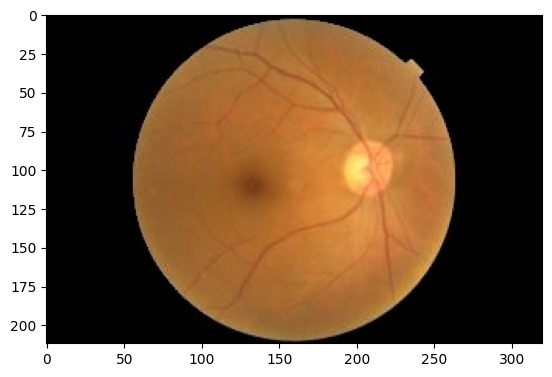

In [58]:
# plt.imshow(Lambda(read_image)('/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/overall_data/1/1/TRAIN034480.jpg').permute(1,2,0))
plt.imshow(Lambda(read_image)('/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/overall_data/3/3/TRAIN056176.jpg').permute(1,2,0))

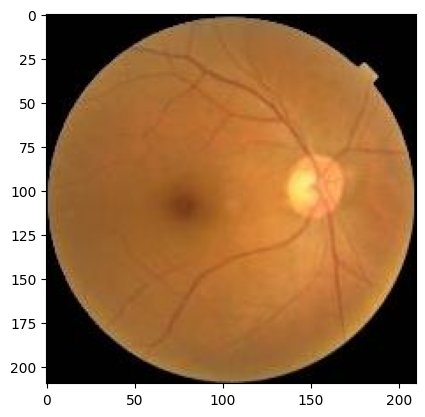

In [56]:
# We see that the image is clearly not cropped properly....
# So what might have happened??
plt.imshow(img.permute(1,2,0))

In [13]:
c,h,w = img.shape


left_half_axis_1d = img[0, h//2,:w//2].tolist()
top_half_axis_1d = img[0, :h//2,w//2].tolist()

right_half_axis_1d = img[0, h//2,w//2:].tolist()
bottom_half_axis_1d = img[0, h//2:,w//2].tolist()

h_left = next((i for i, x in enumerate(left_half_axis_1d) if x != 0), None) # Gives the index of first non zero element and returns None after it has found first non zero element
w_top = next((i for i, x in enumerate(top_half_axis_1d) if x != 0), None) # Gives the index of first non zero element and returns None after it has found first non zero element


h_right = next((len(right_half_axis_1d) - 1 - i for i, x in enumerate(reversed(right_half_axis_1d)) if x != 0), None) # Gives the index of first non zero element and returns None after it has found first non zero element
w_bottom = next((len(bottom_half_axis_1d) - 1 - i for i, x in enumerate(reversed(bottom_half_axis_1d)) if x != 0), None) # Gives the index of first non zero element and returns None after it has found first non zero element


In [14]:
left_half_axis_1d

[3,
 15,
 30,
 98,
 128,
 144,
 144,
 142,
 145,
 146,
 148,
 151,
 151,
 147,
 149,
 150,
 148,
 149,
 149,
 147,
 146,
 146,
 148,
 151,
 153,
 155,
 157,
 156,
 156,
 155,
 156,
 157,
 162,
 158,
 157,
 159,
 158,
 155,
 156,
 159,
 155,
 155,
 154,
 152,
 150,
 151,
 154,
 157,
 157,
 157,
 155,
 153,
 154,
 157,
 161,
 161,
 160,
 160,
 160,
 158,
 158,
 160,
 166,
 170,
 167,
 165,
 162,
 162,
 164,
 167,
 168,
 168,
 169,
 162,
 159,
 162,
 165,
 164,
 163,
 164,
 167,
 166,
 167,
 170,
 169,
 165,
 164,
 167,
 168,
 169,
 171,
 172,
 173,
 173,
 173,
 173,
 178,
 176,
 176,
 179,
 179,
 175,
 175,
 177,
 179,
 179,
 180,
 180,
 179,
 178,
 177,
 177,
 181,
 181,
 181,
 180,
 181,
 181,
 181,
 182,
 182,
 182,
 182,
 183,
 184,
 183,
 182,
 181,
 182,
 183,
 185,
 189,
 190,
 188,
 188,
 188,
 193,
 188,
 186,
 187,
 188,
 186,
 189,
 193,
 190,
 191,
 191,
 192,
 193,
 193,
 194,
 194,
 193,
 192,
 192,
 191,
 191,
 191,
 192,
 192,
 192,
 189,
 187,
 188,
 192,
 195,
 194,
 19

In [15]:
# Extract x and y
x = df['height']
y = df['width']
# Define the borders
# deltaX = (max(x) - min(x))/10
# deltaY = (max(y) - min(y))/10
xmin = min(x) #- deltaX
xmax = max(x) #+ deltaX
ymin = min(y) #- deltaY
ymax = max(y) #+ deltaY
print(xmin, xmax, ymin, ymax)

210 4493 210 4493


In [16]:
print(xmin, xmax, ymin, ymax)

210 4493 210 4493


/tmp/ipykernel_261603/2560168406.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby(['Height Range', 'Width Range']).size().reset_index(name='Count')


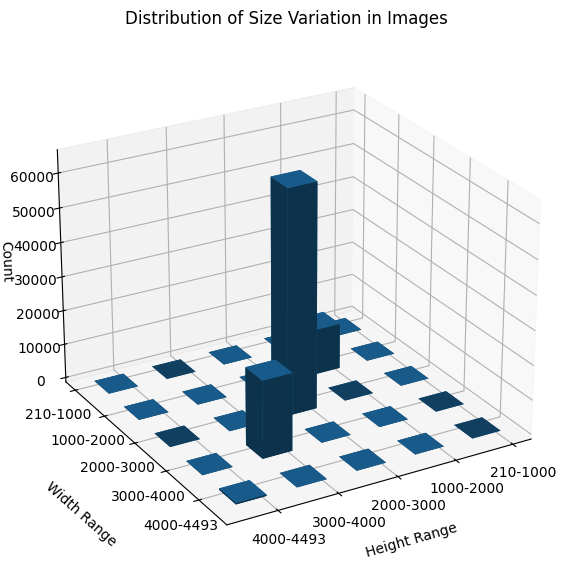

In [17]:
# Define range buckets for height and width
height_bins = [xmin-1, 1000, 2000, 3000, 4000, xmax+1] # we take xmin-1 because it doesnot include the minimum case when we only do xmin
width_bins = [ymin-1, 1000, 2000, 3000, 4000, ymax+1]

# Add bucketed columns
df['Height Range'] = pd.cut(df['height'], bins=height_bins, labels=[f"{xmin}-1000","1000-2000", "2000-3000", f"3000-4000", f"4000-{xmax}"])
df['Width Range'] = pd.cut(df['width'], bins=width_bins, labels=[f"{ymin}-1000","1000-2000", "2000-3000", "3000-4000", f"4000-{ymax}"])

# Count combinations of height and width ranges
count_data = df.groupby(['Height Range', 'Width Range']).size().reset_index(name='Count')

# Prepare data for 3D plotting
height_categories = np.array([f"{xmin}-1000","1000-2000", "2000-3000", f"3000-4000", f"4000-{xmax}"])
width_categories = np.array([f"{xmin}-1000","1000-2000", "2000-3000", f"3000-4000", f"4000-{xmax}"])
height_indices = {cat: i for i, cat in enumerate(height_categories)}
width_indices = {cat: i for i, cat in enumerate(width_categories)}

count_data['Height Index'] = count_data['Height Range'].map(height_indices)
count_data['Width Index'] = count_data['Width Range'].map(width_indices)

# Extract x, y, z data for plotting
x = count_data['Height Index']
y = count_data['Width Index']
z = count_data['Count']

# Create 3D plot
fig = plt.figure(figsize=(18, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.bar3d(x, y, np.zeros(len(z)), 0.5, 0.5, z, shade=True)

# Set tick labels for categorical axes
ax.set_xticks(range(len(height_categories)))
ax.set_xticklabels(height_categories)
ax.set_yticks(range(len(width_categories)))
ax.set_yticklabels(width_categories)

# Set axis labels
ax.set_xlabel('Height Range', labelpad=10)
ax.set_ylabel('Width Range', labelpad=20)
ax.set_zlabel('Count')

# ax.tick_params(axis='x', pad=10)
# ax.tick_params(axis='y', pad=10)

ax.view_init(25, 60)
plt.title('Distribution of Size Variation in Images')
plt.show()

In [19]:
df['Height Range'].isnull().sum(), df['Width Range'].isnull().sum()

(0, 0)

In [20]:
# df[df['Height Range'].isnull()]
# df[df['Width Range'].isnull()]

In [21]:
df['Height Range'].value_counts()

Height Range
2000-3000    65266
3000-4000    22476
1000-2000    13302
4000-4493      359
210-1000        39
Name: count, dtype: int64

In [22]:
df['Width Range'].value_counts()

Width Range
2000-3000    65266
3000-4000    22476
1000-2000    13302
4000-4493      359
210-1000        39
Name: count, dtype: int64

In [23]:
df['label'].value_counts()

label
NRG    98172
RG      3270
Name: count, dtype: int64

In [24]:
height_ranges = [xmin, 1000, 2000, 3000, 4000, xmax]
width_ranges = [ymin, 1000, 2000, 3000, 4000, ymax]

In [25]:
for i in range(len(height_ranges)-1):
    for j in range(len(width_ranges)-1):
        print(f"Count of height[{height_ranges[i]}-{height_ranges[i+1]}] & width[{width_ranges[j]}-{width_ranges[j+1]}] : {((df['Height Range'] == f'{height_ranges[i]}-{height_ranges[i+1]}') & (df['Width Range'] == f'{width_ranges[j]}-{width_ranges[j+1]}')).sum()}")

Count of height[210-1000] & width[210-1000] : 39
Count of height[210-1000] & width[1000-2000] : 0
Count of height[210-1000] & width[2000-3000] : 0
Count of height[210-1000] & width[3000-4000] : 0
Count of height[210-1000] & width[4000-4493] : 0
Count of height[1000-2000] & width[210-1000] : 0
Count of height[1000-2000] & width[1000-2000] : 13302
Count of height[1000-2000] & width[2000-3000] : 0
Count of height[1000-2000] & width[3000-4000] : 0
Count of height[1000-2000] & width[4000-4493] : 0
Count of height[2000-3000] & width[210-1000] : 0
Count of height[2000-3000] & width[1000-2000] : 0
Count of height[2000-3000] & width[2000-3000] : 65266
Count of height[2000-3000] & width[3000-4000] : 0
Count of height[2000-3000] & width[4000-4493] : 0
Count of height[3000-4000] & width[210-1000] : 0
Count of height[3000-4000] & width[1000-2000] : 0
Count of height[3000-4000] & width[2000-3000] : 0
Count of height[3000-4000] & width[3000-4000] : 22476
Count of height[3000-4000] & width[4000-4493] 

In [26]:
print(f"Count of height[{xmin}-1000] & width[{ymin}-1000] : {((df['Height Range'] == f'{xmin}-1000') & (df['Width Range'] == f'{ymin}-1000')).sum()}")
print(f"Count of height[1000-2000] & width[2000-3000] : {((df['Height Range'] == f'1000-2000') & (df['Width Range'] == f'2000-3000')).sum()}")

Count of height[210-1000] & width[210-1000] : 39
Count of height[1000-2000] & width[2000-3000] : 0


In [27]:
df['Mean Intensity Value'].min(), df['Mean Intensity Value'].max()

(3.359330892562866, 172.22096252441406)

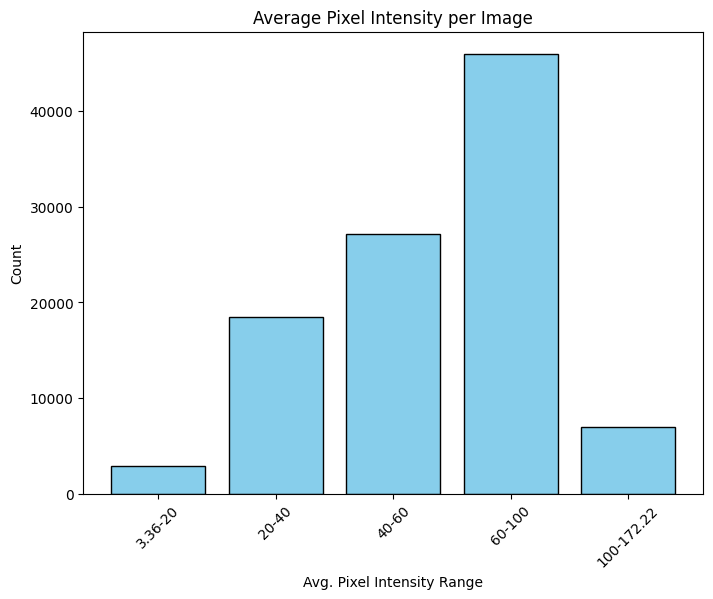

In [28]:
intensity_min = df['Mean Intensity Value'].round(2).min()
intensity_max = df['Mean Intensity Value'].round(2).max()

bins = [intensity_min-1, 20, 40, 60, 100, intensity_max] # because minimum value won't be taken so take range of min_value -1 
labels = [f'{intensity_min}-20', '20-40', '40-60', '60-100', f'100-{intensity_max}']

# Create a new column for the bucket ranges
df['Intensity Range'] = pd.cut(df['Mean Intensity Value'], bins=bins, labels=labels, include_lowest=True)

# Count the number of images in each bucket
distribution = df['Intensity Range'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(distribution.index, distribution.values, color='skyblue', edgecolor='black')
plt.xlabel('Avg. Pixel Intensity Range')
plt.ylabel('Count')
plt.title('Average Pixel Intensity per Image')
plt.xticks(rotation=45)
plt.show()

In [23]:
df["Intensity Range"].isnull().sum()

0

In [24]:
df[(df['Intensity Range']== "3.47-20")].sort_values(by=["Mean Intensity Value"], ascending=True)

,Image Name,height,width,label,train_val_test,Mean Intensity Value,"Mean Intensity Value R,G,B",Height Range,Width Range,Intensity Range


In [25]:
df[(df['Intensity Range']== "100-172.42")].sort_values(by=["Mean Intensity Value"], ascending=False)

,Image Name,height,width,label,train_val_test,Mean Intensity Value,"Mean Intensity Value R,G,B",Height Range,Width Range,Intensity Range


In [20]:
import torch 
# from torchvision.ops import sigmoid_focal_loss

In [54]:
predictions = torch.tensor([[-500, 500], [-500, 500], [-500, 500], [-500, 500]])
targets = torch.tensor([0,0,0,0])
# targets = torch.tensor([1, 1, 1, 1])
targets_onehot = torch.nn.functional.one_hot(targets, num_classes=2)


In [55]:
print(torch.sigmoid(predictions))

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])


In [56]:
def sigmoid_focal_loss(
    inputs: torch.Tensor,
    targets: torch.Tensor,
    alpha: float = 0.25,
    gamma: float = 2,
    reduction: str = "none",
) -> torch.Tensor:
    """
    Loss used in RetinaNet for dense detection: https://arxiv.org/abs/1708.02002.

    Args:
        inputs (Tensor): A float tensor of arbitrary shape.
                The predictions for each example.
        targets (Tensor): A float tensor with the same shape as inputs. Stores the binary
                classification label for each element in inputs
                (0 for the negative class and 1 for the positive class).
        alpha (float): Weighting factor in range (0,1) to balance
                positive vs negative examples or -1 for ignore. Default: ``0.25``.
        gamma (float): Exponent of the modulating factor (1 - p_t) to
                balance easy vs hard examples. Default: ``2``.
        reduction (string): ``'none'`` | ``'mean'`` | ``'sum'``
                ``'none'``: No reduction will be applied to the output.
                ``'mean'``: The output will be averaged.
                ``'sum'``: The output will be summed. Default: ``'none'``.
    Returns:
        Loss tensor with the reduction option applied.
    """
    # Original implementation from https://github.com/facebookresearch/fvcore/blob/master/fvcore/nn/focal_loss.py

    p = torch.sigmoid(inputs)
    ce_loss = torch.nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction="none")
    print(ce_loss)
    p_t = p * targets + (1 - p) * (1 - targets)
    loss = ce_loss * ((1 - p_t) ** gamma)

    if alpha >= 0:
        alpha_t = alpha * targets + (1 - alpha) * (1 - targets)
        loss = alpha_t * loss

    # Check reduction option and return loss accordingly
    if reduction == "none":
        pass
    elif reduction == "mean":
        loss = loss.mean()
    elif reduction == "sum":
        loss = loss.sum()
    else:
        raise ValueError(
            f"Invalid Value for arg 'reduction': '{reduction} \n Supported reduction modes: 'none', 'mean', 'sum'"
        )
    return loss


In [57]:
alpha = -1#0.25  # defaults
gamma = 0#2.0 # defaluts

loss = sigmoid_focal_loss(predictions.float(), targets_onehot.float(), alpha=alpha, gamma=gamma, reduction="mean")
loss

tensor([[500., 500.],
        [500., 500.],
        [500., 500.],
        [500., 500.]])


tensor(500.)

In [2]:
import torch
from monai.losses import FocalLoss

pred = torch.tensor([[-500, 500], [-500, 500], [-500, 500]], dtype=torch.float32)
grnd = torch.tensor([1, 1, 1], dtype=torch.int64)
fl = FocalLoss(to_onehot_y=True, gamma=0.0, alpha=None, reduction="mean")
fl(pred, grnd)

tensor(0.)

In [5]:
pred.shape

torch.Size([3, 2])